<a href="https://colab.research.google.com/github/QFrankQ/Applied-Numerical-Optimization/blob/main/Logistic_Regression_and_Newton's_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Logistic Regression**#
To help you better understand the pros and cons of first- and second-order methods,
we will look at Logistic Regression as an example. \\


**Step 1**: You already have the gradient descent algorithm (use the line search version from PA1). Now,
code up the Newton’s method algorithm as well. Write a function using the format below:

In [ ]:
import math
import numpy as np

def nt(f,fp,fpp,y,A,xinit,maxit,tol):
  '''
  Note that you do no need to input a step size parameter
  fpp is the function  handle  of  the  Hessian
  '''
  global nt_it
  nt_it = 0
  change = math.inf
  x = xinit
  while nt_it <= maxit and change > tol:
    x_change = - np.linalg.inv(fpp(y, A, x)) @ fp(y, A, x)
    new_x = x + x_change
    change = abs(f(y, A, new_x) - f(y, A, x)) / abs(f(y, A, x))
    nt_it += 1
    x = new_x
  return x

def gd_ls(f,fp,y,A,xinit,ss_init,maxit,tol):
  """
  Note that ss changes to ss_init
  ss_init is the starting stepsize for backtracking
  """
  # Add your code here
  global ls_it
  ls_it = 0
  x = xinit
  ss = ss_init
  change = math.inf
  alpha, beta = 1, 1/2
  while maxit >= ls_it and change > tol:
    while f(y, A, x - ss * fp(y, A, x)) > f(y, A, x) - (alpha/2)*ss*(np.linalg.norm(fp(y, A, x))**2):
      ss = beta * ss 
    x_change = - ss * fp(y, A, x)
    new_x = x + x_change
    change = abs(f(y, A, new_x) - f(y, A, x)) / abs(f(y, A, x))
    ls_it += 1
    x = new_x
  return x


**Note**: we will implement the basic version of Newton’s method (not BFGS or L-BFGS). We will also
use the basic method to implement the Newton step by inverting the Hessian using np.linalg.inv.
There are more efficient ways to do this inversion, but for the purpose of this assignment, do **NOT** use
other ways even if you know them. The convergence criterion is the same as that in PA1.

*Answer the questions and discuss your findings here*


**Step 2**: Code the objective function, the gradient, and the **Hessian** (you can use the Python lambda
tool just like in PA1, or the regular function environment if you don’t like that). As a reminder, logistic
regression has the following model
$$y_i \in \{0,1\}, \quad p(y_i = 1) = \text{sigmoid}(\mathbf{a}_i^T \mathbf{x}) =  \frac{1}{1+e^{-\mathbf{a}_i^T \mathbf{x}}}, \quad p(y_i=0) = 1 - p(y_i = 1).$$
The likelihood can be written as 
$$p(y_i \,|\, \mathbf{a}_i^T \mathbf{x}) = p(y_i = 1 \, | \, \mathbf{a}_i^T \mathbf{x})^y_i \cdot p(y_i = 0 \, | \, \mathbf{a}_i^T \mathbf{x})^{1-y_i} $$
So we are solving the following optimization problem that minimizes the total negative log-likelihood
minimize \\
$$\underset{\mathbf{x}}{\text{minimize}} \quad \quad  - \sum_{i=1}^M (y_i \log \frac{1}{1+e^{-\mathbf{a}_i^T \mathbf{x}}} + (1-y_i) \log \frac{1}{1+e^{\mathbf{a}_i^T \mathbf{x}}}),$$
or equivalently 
$$minimize_{\mathbf{x}} \sum_{i=1}^{M}\log({1+e^{-(2y_i-1)a_i^T \mathbf{x}}})$$
where $y_i$ is the $i^{th}$ entry of the observation vector $\mathbf{y}$ and $\mathbf{a}_i$ is a column vector corresponding to the $i^{th}$ row of the matrix of covariates **A**.


In [ ]:
"""
  Add your code here
"""
z = lambda y, A, x, c: np.exp(c*(2*y - np.full(y.shape, 1)) * (A @ x))
f = lambda y, A, x: np.sum(np.log(1 + np.exp(-(2*y - np.full(y.shape, 1)) * (A @ x) )))
fp = lambda y, A, x: -A.T @ ((2*y - np.full(y.shape, 1)) / (np.full(y.shape, 1) + z(y, A, x, 1)))
fpp = lambda y, A, x: A.T @ (np.diag(np.full(y.shape, 1) / (np.full(y.shape, 2) + z(y, A, x, 1) + z(y, A, x, -1)))) @ A

a = np.array([1, 2, 3])
b = np.full(3, 1)
print(b)


[1 1 1]


*Answer the questions and discuss your findings here*


**Step 3**: Generate data. Set numpy’s random seed to 0. Then, generate the matrix of covariates
**A** $\in \mathbb{R}^{M \times N}$, which has i.i.d. entries distributed as N (0, 1). Use the same method, generate the
regression coefficient vector $\mathbf{x}$ $\in$ $\mathbb{R}^N$ as well. Then, generate the observation vector $\mathbf{y} \in \{0, 1\}^M$ using
np.random.binomial().

In [ ]:
"""
  Add your code here
"""
M= 200
N = 5
np.random.seed(0)
gen_A = lambda M, N: np.random.normal(0, 1, (M, N))
gen_x = lambda M, N: np.random.normal(0, 1, (N))
gen_y = lambda M, N: np.random.binomial(1, 0.5, M)# weird function

*Answer the questions and discuss your findings here*


**Step 4**: Run your code. Apply both algorithms to the logistic regression objective. The algorithm
parameters (maxit and tol) should be the same as that in PA1. Note that for logistic regression,
it could be difficult to choose the ss_init parameter. For this assignment, we will set it to be 400
divided by the square of the maximum singular value of the matrix **A**.

In [ ]:
"""
  Add your code here
"""

M, N = 100, 20
A = gen_A(M, N)
x = gen_x(M, N)
y = gen_y(M, N)
U, D, vh = np.linalg.svd(A)
ss_init = 400 / pow(np.amax(D), 2)
maxit = 10000
tol = 1e-15

*Answer the questions and discuss your findings here*


**1**) First, set M = 100 and N = 20. At convergence, print out the final cost, time taken, and number of
iterations used by both algorithms. You should see that the final costs are more or less the same. Which
algorithm is faster overall? Which algorithm converges in fewer iterations? Which algorithm has a longer
per-iteration run time? Why?


In [ ]:
"""
  Add your code here
"""

xinit = np.zeros(N)
%timeit gd_ls(f,fp,y,A,xinit,ss_init,maxit,tol)
print(f"cost for line search: {np.sum(x - gd_ls(f,fp,y,A,xinit,ss_init,maxit,tol))}")
print(f"iterations used for line search: {ls_it}")
%timeit nt(f,fp,fpp,y,A,xinit,maxit,tol)
print(f"cost for Newton's method: {np.sum(x - nt(f,fp,fpp,y,A,xinit,maxit,tol))}")
print(f"iterations used for Newton's method: {nt_it}")





29.9 ms ± 5.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
cost for line search: -6.092102182577287
iterations used for line search: 126
3.89 ms ± 1.81 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
cost for Newton's method: -6.0921022711823065
iterations used for Newton's method: 7


*Answer the questions and discuss your findings here*

Newton's method is faster overall and converges in fewer iterations; Newton's method has longer per-iteration runtime of 0.36ms whereas line search has a per-iteration run time of 0.21ms. Newton's method has a longer per-iteration runtime because it has to compute the Hessian and invert the matrix, which takes a lot of computation. Newton's method also takes less iteration to converge because it does a local quadratic approximation rather than a linear approximation like line search.


**2**) Change the problem dimension to M = 10000 and N = 20. What happens now? How about in the
case of N = 100? Which algorithm is faster overall? Why?


In [ ]:
"""
  Add your code here
"""
M, N = 10000, 20
A = gen_A(M, N)
x = gen_x(M, N)
y = gen_y(M, N)
U, D, vh = np.linalg.svd(A)
ss_init = 400 / pow(np.amax(D), 2)
maxit = 10000
tol = 1e-15

xinit = np.zeros(N)
print("Below are the results for M, N = 10000, 20:\n")
%timeit gd_ls(f,fp,y,A,xinit,ss_init,maxit,tol)
print(f"cost for line search: {np.sum(x - gd_ls(f,fp,y,A,xinit,ss_init,maxit,tol))}")
print(f"iterations used for line search: {ls_it}")
%timeit nt(f,fp,fpp,y,A,xinit,maxit,tol)
print(f"cost for Newton's method: {np.sum(x - nt(f,fp,fpp,y,A,xinit,maxit,tol))}")
print(f"iterations used for Newton's method: {nt_it}")

M, N = 10000, 20
A = gen_A(M, N)
x = gen_x(M, N)
y = gen_y(M, N)
U, D, vh = np.linalg.svd(A)
ss_init = 400 / pow(np.amax(D), 2)
print("\n")
print("Below are the results for M, N = 10000, 100:\n")
%timeit gd_ls(f,fp,y,A,xinit,ss_init,maxit,tol)
print(f"cost for line search: {np.sum(x - gd_ls(f,fp,y,A,xinit,ss_init,maxit,tol))}")
print(f"iterations used for line search: {ls_it}")
%timeit nt(f,fp,fpp,y,A,xinit,maxit,tol)
print(f"cost for Newton's method: {np.sum(x - nt(f,fp,fpp,y,A,xinit,maxit,tol))}")
print(f"iterations used for Newton's method: {nt_it}")






Below are the results for M, N = 10000, 20:

362 ms ± 63.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
cost for line search: -9.842804427382697
iterations used for line search: 14
1.73 s ± 135 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
cost for Newton's method: -9.842804479727027
iterations used for Newton's method: 3


Below are the results for M, N = 10000, 100:

135 ms ± 28.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
cost for line search: -6.275225262012884
iterations used for line search: 13
1.67 s ± 15.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
cost for Newton's method: -6.275225265562029
iterations used for Newton's method: 3


*Answer the questions and discuss your findings here*

For the case M, N = 10000, 20, Newton's method uses significantly more time, but still converges with fewer iterations than line search, line search has better per-iteration runtime than Newton's method with 7.6 ms compared to 226 ms. When N becomes 100, Newton's method takes even more time per-iteration. 

Newton's method still takes less iterations to converge; however, the number of computations and required time for each iteration become drastically greater as the size of matrix gets bigger, taking more time to converge than line search.

Therefore, line search is faster overall when the matrix size is big.


**3**) Load the given data file noisy1.npz. Select one algorithm to recover $\mathbf{x}$ using the same approach as that in PA1. Which algorithm are you going to select? Why? Reshape it to a $40 \times 40$ matrix. Visualize it as an image in grayscale using matplotlib. What do you think is the original image? 

(5000, 1600)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


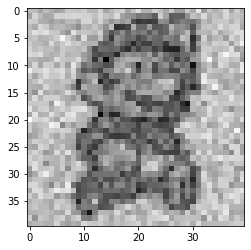

In [ ]:
"""
  Add your code here
"""
import matplotlib.pyplot as plt
data = np.load("noisy1.npz")
y = data['y']
A = data['A']
print(A.shape)
xinit = np.zeros(A.shape[1])
ss_init = 1
tol = 1e-4
maxit = 10000
solution = gd_ls(f,fp,y,A,xinit,ss_init,maxit,tol)
solution = solution.reshape((40,40))
plt.gray()
plt.imshow(solution)

*Answer the questions and discuss your findings here*

It's Mario



#Add Colab link here: # 

https://colab.research.google.com/drive/1rFUwyFutMmVGfWxo76b7lph6PJaZqagN?authuser=1#scrollTo=AZjG-RWk5BGd